In [2]:
import utils
import math
import re
import itertools
from typing import NamedTuple
from collections import defaultdict, deque
import itertools

import numpy as np

import matplotlib.pyplot as plt

## Day 17: Conway Cubes

[#](https://adventofcode.com/2020/day/17). We have an infinite 3d grid, every integer coordinate `x,y,z` can be active or inactive.

We start off with a small 2d initial state in this 3d universe, which boots up by doing 6 cycles. The rules are:

- active cubes with 2 or 3 active neighbours remain active, else they become inactive.
- inactive cubes with 3 active neighbours become active.

Every cube has 26 neighbours.

In [9]:
test17 = """.#.
..#
###"""

inp17 = utils.get_input(17, splitlines=False)

print(test17)

.#.
..#
###


To represent the grid, I'm going to use numpy:

In [13]:
grid.shape

(3, 103, 103)

In [326]:
def parse_17(inp=test17, padding=0):
    """makes a 3d grid of shape (z, x, y)"""
    inp = inp.splitlines()

    width = len(inp[0]) + padding 
    height = len(inp) + padding

    grid = np.zeros((3,height, width), dtype="int")

    for y, row in enumerate(inp):
        y += padding // 2
        for x, char in enumerate(row):
            x += padding // 2
            grid[1][y, x] = 1 if char == "#" else 0

    return grid

grid = parse_17()
grid

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 1, 0],
        [0, 0, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

First up, a simple function to return the neighbours.

In [488]:
grid[0:3]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 1, 0],
        [0, 0, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [496]:
def count_neighbours(point, grid, verbose=False):
    """counts all the neighbours"""
    z, y, x = point
    z_min = max(0, z-1)
    y_min = max(0, y-1)
    x_min = max(0, x-1)
    
    # we minus the point itself as its not a neighbour to itself
    # x and y can't be minus, hence the max(0)
    #print(grid[z_min:z_max, y_min:y+2, x_min:x+2])
    n = grid[z_min:z+2, y_min:y+2, x_min:x+2].sum() - grid[point]
    if n<0:
        print(f"{point=}, {n=} {grid.shape}")
        print(grid[z_min:z+2, y_min:y+2, x_min:x+2])
    return grid[z_min:z+2, y_min:y+2, x_min:x+2].sum() - grid[point]
    
count_neighbours((2,2,1), grid, True)

0

In [497]:
def get_neighbours(point):
    z, x, y = point
    return [(z2, x2, y2) for 
            x2 in range(x-1, x+2) for 
            y2 in range(y-1, y+2) for
            z2 in range(z-1, z+2) if (x2, y2, z2) != point]

neighbours = get_neighbours(point=(1,1,1))
assert(len(neighbours) == 26)

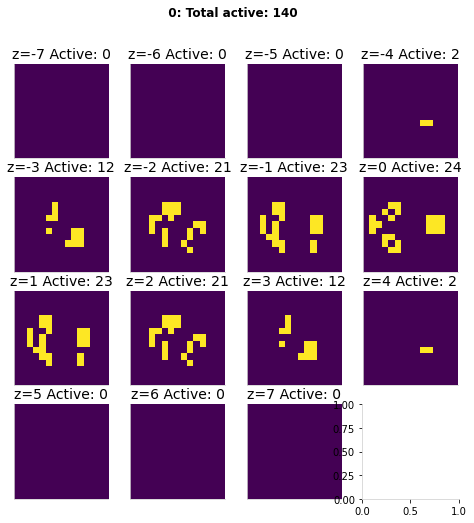

In [498]:
def plot(grid, cycle:int=0):
    n = int(np.ceil(np.sqrt(grid.shape[0])))
    
    fig, axes = plt.subplots(n, n, figsize=(8,8))
    fig.suptitle(f"{cycle:3}: Total active: {grid.sum()}", fontsize=12)
    for ax, z in zip(axes.flat, np.arange(0, grid.shape[0])):
        ax.imshow(grid[z])
        #ax.grid(color="grey", linestyle="-", linewidth=1)
        ax.set_title(f"z={z-grid.shape[0]//2} Active: {grid[z].sum()}")

        # stop the axis from going outside the img
        ax.tick_params(which='both', length=0)

        # don't need axis labels
        for axi in (ax.xaxis, ax.yaxis):
            axi.set_ticklabels([])
    plt.show()
        
plot(grid)

In [ ]:
grid = parse_17(inp=test17, padding=0)
print(f"{grid.shape}, {grid.sum()=}")
plot(grid)

In [ ]:
grid[1]

In [ ]:
for point in np.ndindex(grid.shape):
    if point[0] == 1:
        print(point, grid[point])

(3, 3, 3), grid.sum()=5


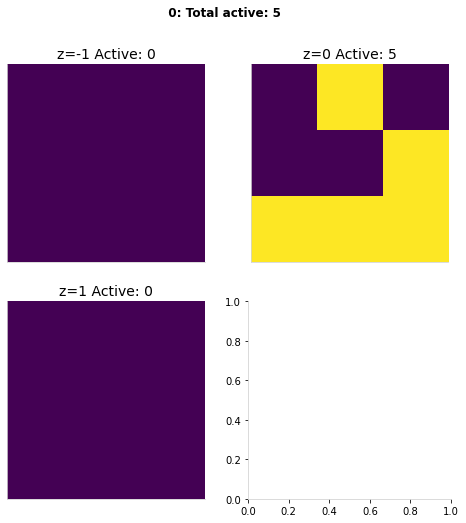

1: Active: 8


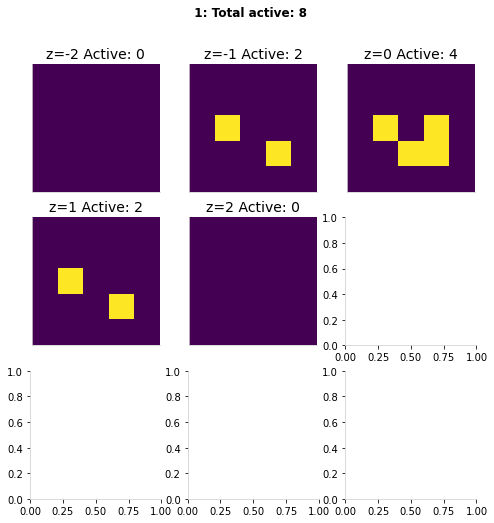

2: Active: 22


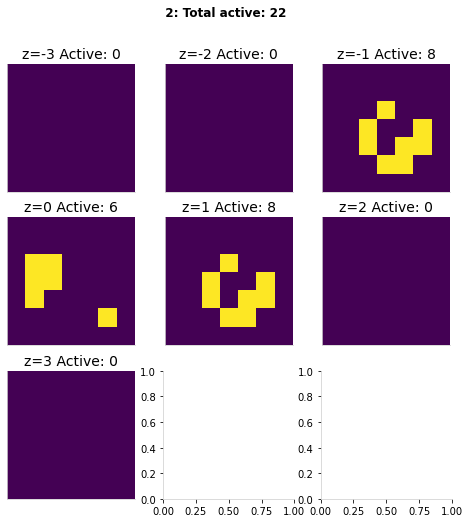

3: Active: 29


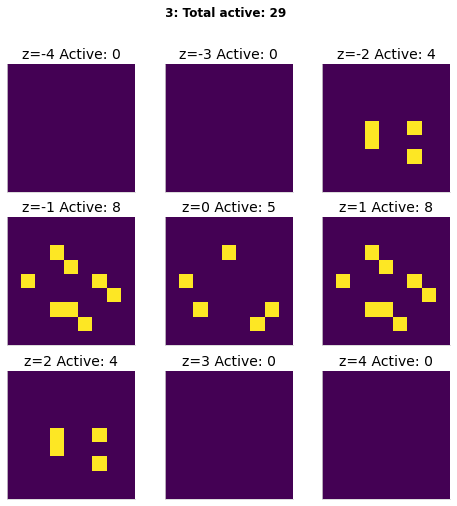

4: Active: 81


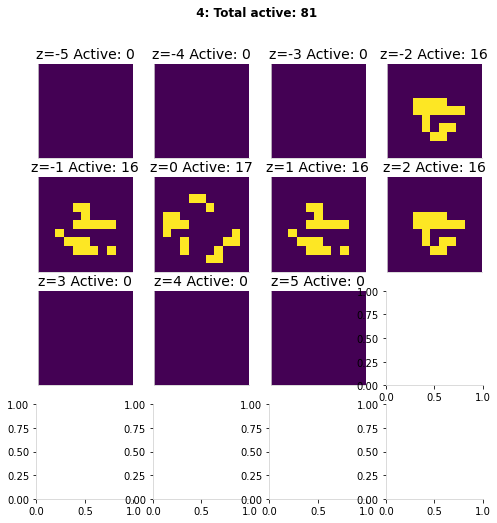

5: Active: 44


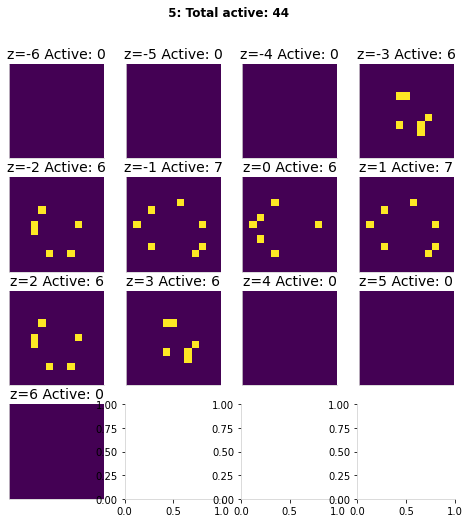

6: Active: 140


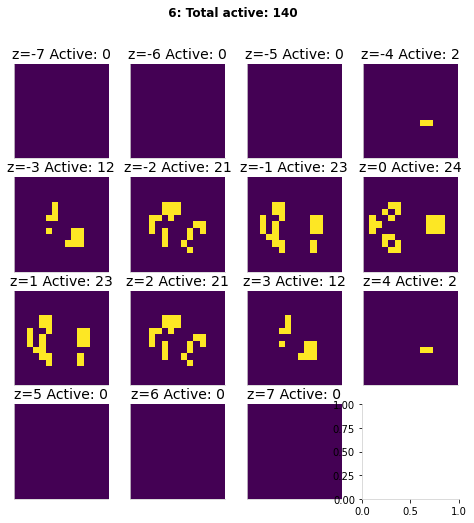

In [492]:
grid = parse_17(inp=test17, padding=0)
print(f"{grid.shape}, {grid.sum()=}")
plot(grid)
npad = ((1,1), (1,1), (1,1)) # padding all dims

cycles = 6

for i in range(1, cycles+1):
    # pad grid so we can check neighbours
    new_grid = np.pad(grid, pad_width=npad) # defaults to padding zeros
    
    for point in np.ndindex(grid.shape):
        neighbours = count_neighbours(point, grid)
        if neighbours < 0:
            print(f"NEGATIVE {point=} {neighbours=}")
        
        new_point = tuple(np.array(point) + 1) # since new grid is bigger
            
        if grid[point] == 1:
            if not (2 <= neighbours <=3):
                new_grid[new_point] = 0
                #print(f"OFF {point=} {neighbours=}")
                
        elif grid[point] == 0:
            if neighbours == 3:
                #print(f"ON {point=} {neighbours=}")
                new_grid[new_point] = 1

    grid = new_grid
    print(f"{i}: Active: {grid.sum()}")
    plot(grid, i)
    plt.show()

In [9]:
def solve_17(inp=test17):
    grid = parse_17(inp, padding=0)
    grid = np.pad(g, pad_width=1, mode="constant", constant_values=0)
    
assert solve_6() == None
solve_6(inp6)

## Part 2



So that should be straightforward:

In [4]:
def solve_6b(inp=test6):
    pass
    
#assert solve_6b() == 6
solve_6b()

In [ ]:
np.pad

In [37]:
g = grid[1].copy()

In [38]:
g

array([[0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]])

In [52]:
np.pad(g, pad_width=1, mode="constant", constant_values=0)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [69]:
# pad the grid if any of the edges have an active node
grid[0][0]

array([0, 0, 0])

In [75]:
a = np.arange(27).reshape((3, 3,3))
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [76]:
a[0]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [85]:
a[:,0] # top rows

array([[ 0,  1,  2],
       [ 9, 10, 11],
       [18, 19, 20]])

In [86]:
a[:,-1] # bottom rows

array([[ 6,  7,  8],
       [15, 16, 17],
       [24, 25, 26]])

In [97]:
a[:,:,0] # left

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [98]:
a[:,:,-1] # right

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])